# HW4_重做 E94041173 張竣佑

## Data Description:本資料為記錄線上購物的顧客瀏覽紀錄
### 其中包含10個數值型與8個類別型資料欄位，以及Revenue為顧客本次瀏覽最終的結果(購買或沒購買)
### 本次資料包含一年份資料，以下介紹各個欄位
##### "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## 載入資料

In [8]:
import pandas as pd
df = pd.DataFrame()
df = pd.read_csv('C:/Users/HARRY/Downloads/online_shoppers_intention.csv')
df = df.drop('Month',axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0


# Data Preprocessing

### 先將非數值型資料轉換 : 
### visitor_type有兩種:returning_visitor、new_visitor、other 依序為0、1、2
### weekend : True、False : 1、0
### Revenue : True、False : 1、0
### Drop掉month行

In [2]:
df = df.drop('Month',axis=1)

vt = pd.unique(df['VisitorType'])
print(vt)
for index in range(len(df)):
    print(index)
    if df['VisitorType'][index] == vt[0]:
        df['VisitorType'][index] = 0
    elif df['VisitorType'][index] == vt[1]:
        df['VisitorType'][index] = 1
    elif df['VisitorType'][index] == vt[2]:
        df['VisitorType'][index] = 2
wk = pd.unique(df['Weekend'])
print(wk)
for index in range(len(df)):
    print(index)
    if df['Weekend'][index] == wk[0]:
        print('here')
        df['Weekend'][index] = 0
    elif df['Weekend'][index] == wk[1]:
        df['Weekend'][index] = 1
rv = pd.unique(df['Revenue'])
print(rv)
for index in range(len(df)):
    print(index)
    if df['Revenue'][index] == rv[0]:
        df['Revenue'][index] = 0
    elif df['Revenue'][index] == rv[1]:
        df['Revenue'][index] = 1
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,0,1,0


### 由於欄位眾多，我先定義problem再做分析
### Problem  : 預測該位瀏覽者是否最終購買(Revenue = True)

## 先不做任何資料處理，直接跑分類模型
### 模型選擇 : LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = df.drop('Revenue',axis=1)
y = df['Revenue']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.832047156327

## Analyze the Data

### 首先，從correlation下手，因為想先刪去一些欄位。

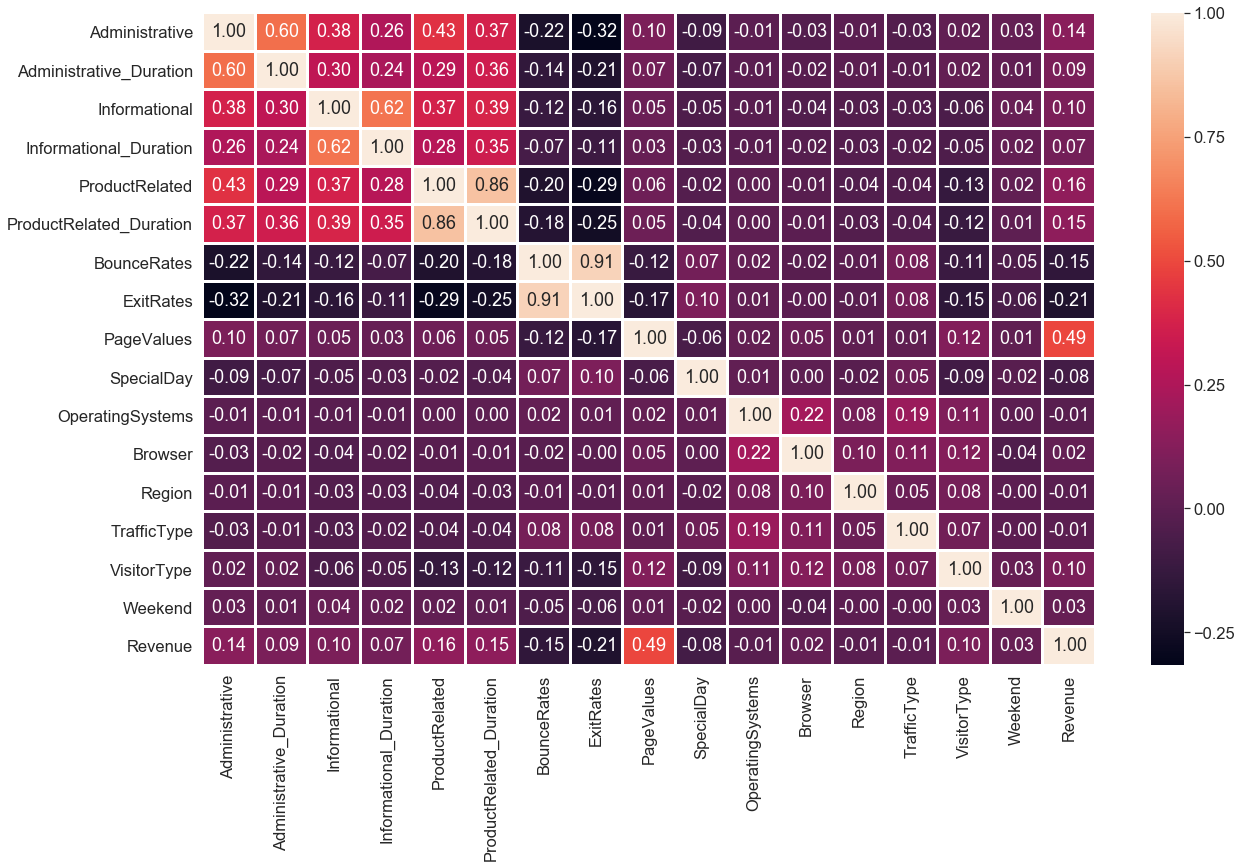

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
sns.set(style="white",font_scale=1.5)
sns.heatmap(df.corr(), fmt='.2f',annot=True,xticklabels=True,linewidth=2)

### 刪去|correlation| < 0.1 的 features (與revenue)

In [21]:
#df = df.drop(['Administrative_Duration','Informational_Duration','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend'],axis=1)
df.head(10)

,Administrative,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,VisitorType,Revenue
0,0,0,1,0.000000,0.200000,0.200000,0.0,0,0
1,0,0,2,64.000000,0.000000,0.100000,0.0,0,0
2,0,0,1,0.000000,0.200000,0.200000,0.0,0,0
3,0,0,2,2.666667,0.050000,0.140000,0.0,0,0
4,0,0,10,627.500000,0.020000,0.050000,0.0,0,0
5,0,0,19,154.216667,0.015789,0.024561,0.0,0,0
6,0,0,1,0.000000,0.200000,0.200000,0.0,0,0
7,1,0,0,0.000000,0.200000,0.200000,0.0,0,0
8,0,0,2,37.000000,0.000000,0.100000,0.0,0,0
9,0,0,3,738.000000,0.000000,0.022222,0.0,0,0


### 處理後的DATA再用一次LogisticRegression

In [61]:
x = df.drop(['Revenue'],axis=1)
y = df['Revenue']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.8852297861882527

## Improvement
### 由於資料本身為記錄性質，不太能自行創造一些features 因此選擇從改期它模型下手
### 使用randomforest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.8923568444335217

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_147 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_174 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_148 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_175 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_149 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_176 (Dense)            (None, 64)                2112      
__________

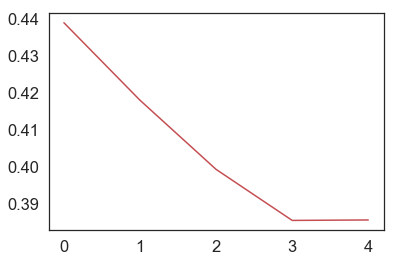

In [62]:
import keras
from sklearn import preprocessing
from keras.models import Sequential      ###模型選擇###
from keras.layers import Dense,Dropout   ###用於定義神經網路層###
from keras.optimizers import Adam     ###選擇優化器###
from keras.layers import BatchNormalization 
from keras.layers import Conv1D,MaxPooling1D,Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
###---###
NN_x_train = preprocessing.normalize(x_train)
NN_x_test = preprocessing.normalize(x_test)
###---------建構模型--------###
model = Sequential()                                              ###TOBEDEFINE選擇原因###
model.add(Dense(8,activation = 'relu',input_shape = (8,)))    ###建構第一層輸入層###
model.add(Dropout(0.2))                                           ###防止OVERFITTING捨棄0.2%的層數###
model.add(Dense(16,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(Dense(32,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(Dense(64,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2))
model.add(Dense(32,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2))
model.add(Dense(8,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(BatchNormalization())
model.add(Dense(2,activation = 'softmax'))                       ###輸出層###
model.summary()
###-------調整模型參數-------###
model.compile(loss = 'categorical_crossentropy',                  ###LOSS FUNCTION使用一般CROSSRNTROPY###
             optimizer = Adam(lr=0.1),                               ###優化器###
             metrics = ['accuracy'])                              ###準確率使用accuracy###

# class_weight = {
#     0: 1.,
#     1: 1239 / 1025
# }
###---------training---------###
history = model.fit(NN_x_train,y_train,batch_size = 64,epochs = 5,verbose = 1, ###fitting data###
         validation_data = (NN_x_test,y_test))
'''
batch_size = 64 --> 每次訓練丟64張圖片
epochs = 2 --> 訓練2輪
verbose = 1 --> 選擇輸出訊息方式,0不輸出,1一直輸出更新,2每個epoch輸出一次
'''

###---------計算score---------###

score = model.evaluate(NN_x_test,y_test,verbose = 1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

###------done the mission------###
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_141 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_167 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_142 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_143 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 64)                2112      
__________

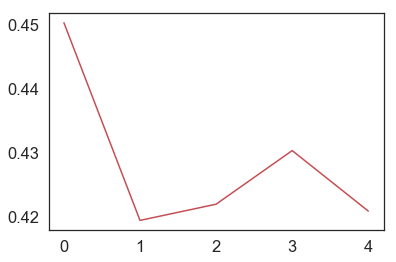

In [60]:

###---###
NN_x_train = preprocessing.normalize(x_train)
NN_x_test = preprocessing.normalize(x_test)
###---------建構模型--------###
model = Sequential()                                              ###TOBEDEFINE選擇原因###
model.add(Dense(8,activation = 'relu',input_shape = (8,)))    ###建構第一層輸入層###
model.add(Dropout(0.2))                                           ###防止OVERFITTING捨棄0.2%的層數###
model.add(Dense(16,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(Dense(32,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.3)) 
model.add(Dense(64,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.4))
model.add(Dense(32,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.4))
model.add(Dense(8,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.5)) 
model.add(BatchNormalization())
model.add(Dense(2,activation = 'softmax'))                       ###輸出層###
model.summary()
###-------調整模型參數-------###
model.compile(loss = 'categorical_crossentropy',                  ###LOSS FUNCTION使用一般CROSSRNTROPY###
             optimizer = Adam(lr=0.1),                               ###優化器###
             metrics = ['accuracy'])                              ###準確率使用accuracy###

# class_weight = {
#     0: 1.,
#     1: 1239 / 1025
# }
###---------training---------###
history = model.fit(NN_x_train,y_train,batch_size = 64,epochs = 5,verbose = 1, ###fitting data###
         validation_data = (NN_x_test,y_test))
'''
batch_size = 64 --> 每次訓練丟64張圖片
epochs = 2 --> 訓練2輪
verbose = 1 --> 選擇輸出訊息方式,0不輸出,1一直輸出更新,2每個epoch輸出一次
'''

###---------計算score---------###

score = model.evaluate(NN_x_test,y_test,verbose = 1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

###------done the mission------###
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### 結論 : 由原本的資料去跑模型準確率大概8成5，可見這些紀錄的特徵的確影響使用者當次瀏覽的購買意願
### original_model:未處理features的Logistic_regression
### result:未處理features的Logistic_regression為0.86
### approach to improve: 
#### 1.對features進行correlation分析，drop掉絕對值後小於0.1的features 準確率上升至0.88
#### 2.使用不同模型 : RandomForest、NN，RandomForest為0.89、NN則大約為0.85
### 雖然使用神經網路的成效沒有比LogisticRegression、RandomForest來得好，不過可以對於其中調整參數做說明，一開始使用5層隱藏層的神經網路，成效為0.84，後來覺得在中間的隱藏層有overfitting嚴重的問題，因此drop掉更多的神經元，來到準確率0.85，由於對神經網路的著墨不深，希望往後可以用更強的模型去做訓練。
### improvement:0.85->0.86->0.88->0.89